**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Dataset**

In [2]:
df = pd.read_csv('/content/loan_dataset.csv')

**Analyse dataset**

In [3]:
# First 5 rows of dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Number of rows and columns
# 614 rows and 13 columns
df.shape

(614, 13)

In [5]:
# Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Statistics summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Clean the dataset**

In [7]:
# Drop Load_ID column as it will not help to predict load_status
df.drop('Loan_ID',axis=1,inplace=True)

In [8]:
# Instead of 13 rows now we have 12 as we deleted Load_ID
df.shape

(614, 12)

In [9]:
# Find if there are missing values in dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Showing missing values in order
df.isnull().sum().sort_values()

Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

In [11]:
# Unique values in Married, Gender,Dependents, Self_Employed, Credit_History
print(df['Credit_History'].unique())
print(df['Self_Employed'].unique())
print(df['Dependents'].unique())
print(df['Loan_Amount_Term'].unique())
print(df['Gender'].unique())
print(df['Married'].unique())

[ 1.  0. nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
['Male' 'Female' nan]
['No' 'Yes' nan]


In [12]:
columns = ['Credit_History', 'Self_Employed','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
for col in columns:
  print(f"{df[col].value_counts()}\n")

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Gender
Male      489
Female    112
Name: count, dtype: int64

Married
Yes    398
No     213
Name: count, dtype: int64



Missing values are filled by the most frequent values(mode)

1. Credit_History have 475 values as 1 so missing 50 values will be filled with 1

2. Self_Employed have 500 values as No so missing 32 values will be filled with No

3. Dependents have 345 values as 0 so missing 15 values will be filled with 0

4. Dependents have 512 values as 360 so missing 14 values will be filled with 360

4. Gender have 489 values as Male so missing 13 values will be filled with Male

5. Married have 398 values as Yes so missing 3 values will be filled with Yes

Mode = most frequent value

In [13]:
for col in columns:
    df[col] = df[col].fillna(df[col].dropna().mode().values[0])

Fill loan amount with the mean value

In [14]:
mean_loan_amount = round(df['LoanAmount'].mean())
print(mean_loan_amount)

# Fill missing values in 'LoanAmount' with the rounded mean
df['LoanAmount'].fillna(mean_loan_amount, inplace=True)

146


In [15]:
# Showing missing values in order
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


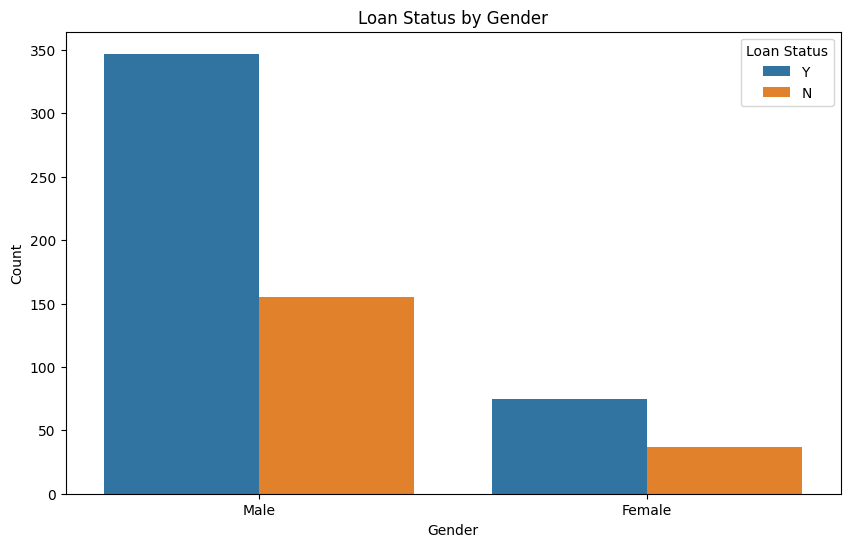

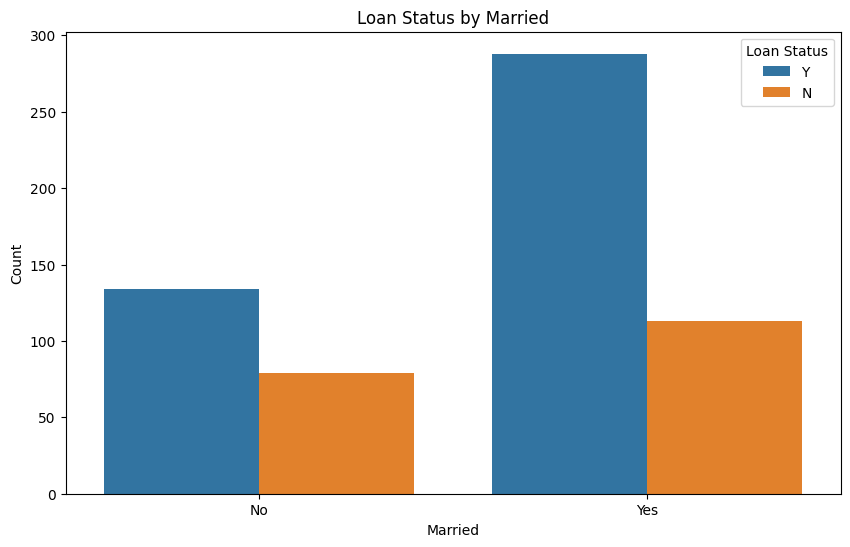

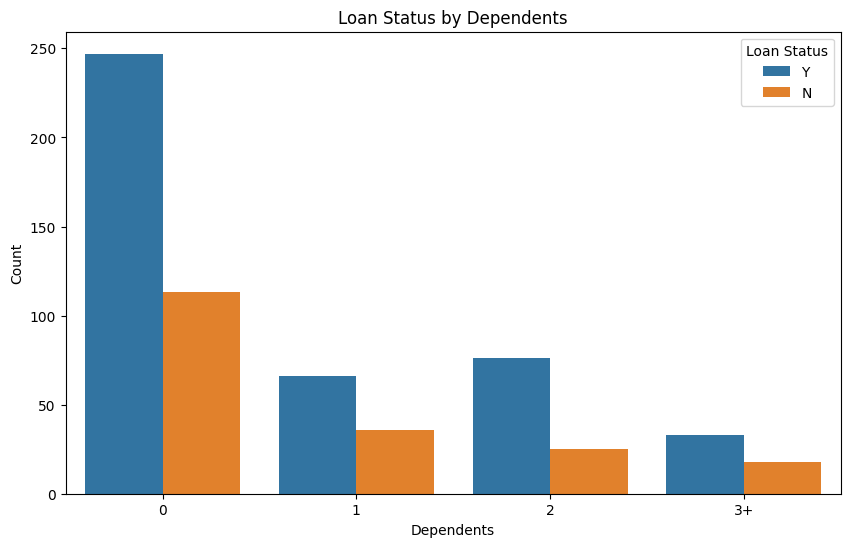

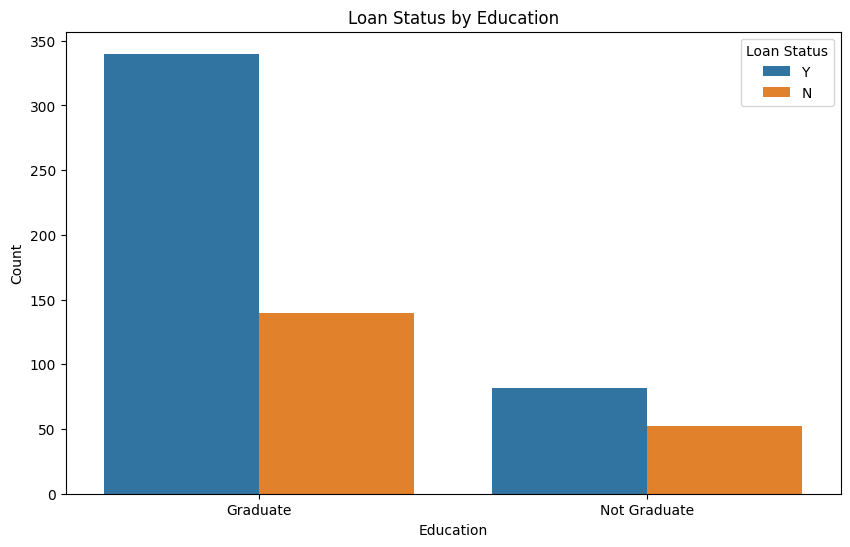

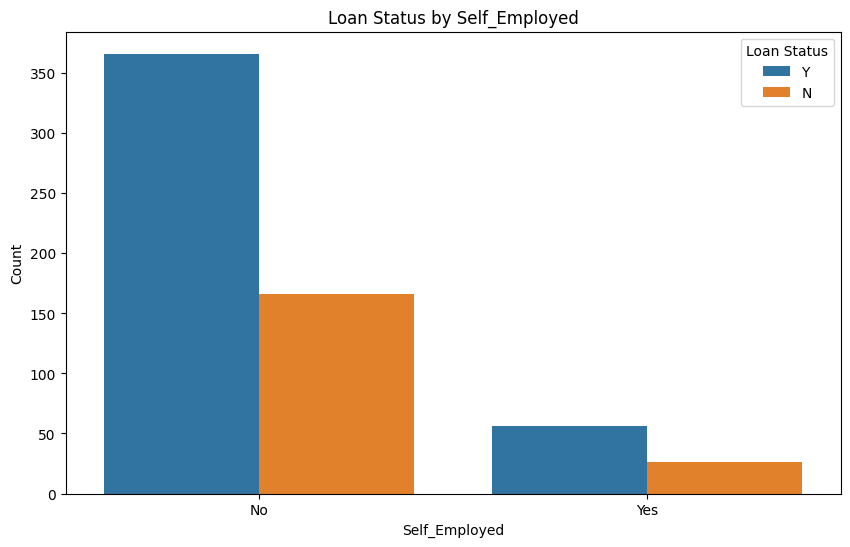

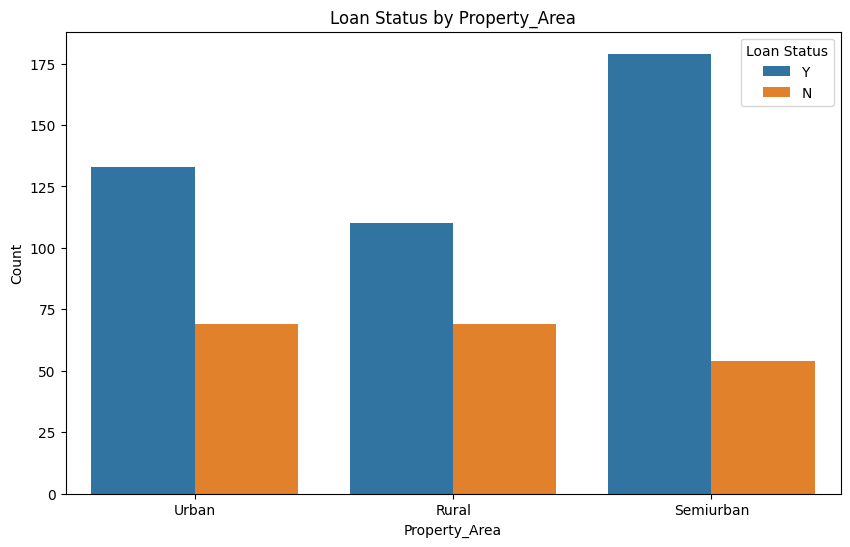

In [17]:
# Plot Categorical vs Loan_Status
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Loan_Status', data=df)
    plt.title(f'Loan Status by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()

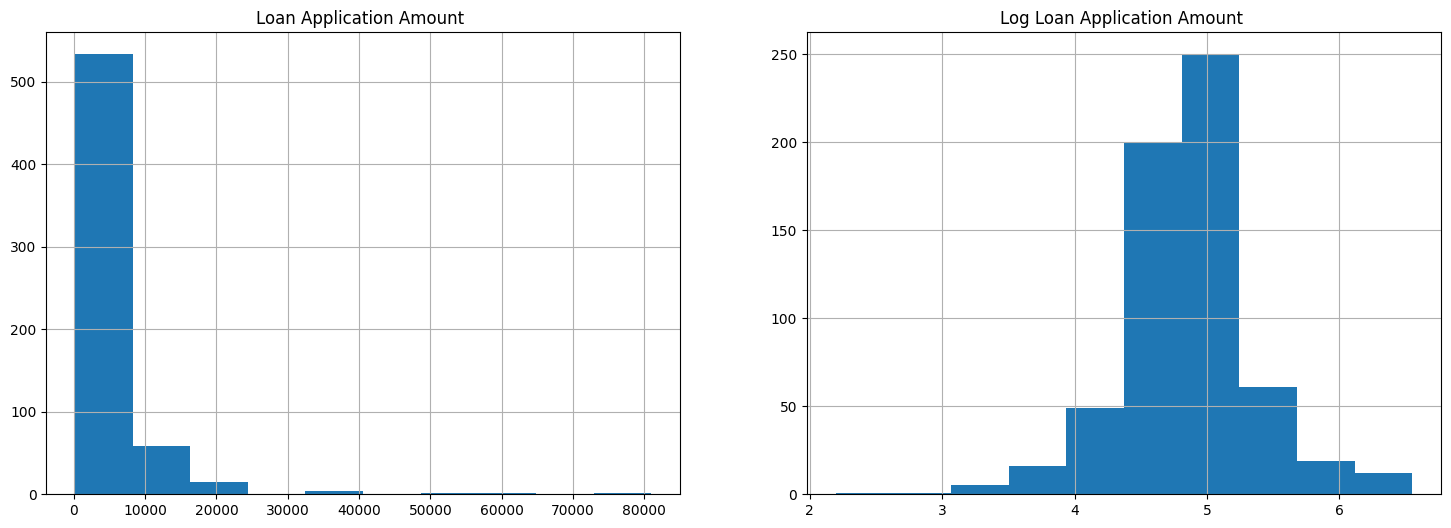

In [18]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


df['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

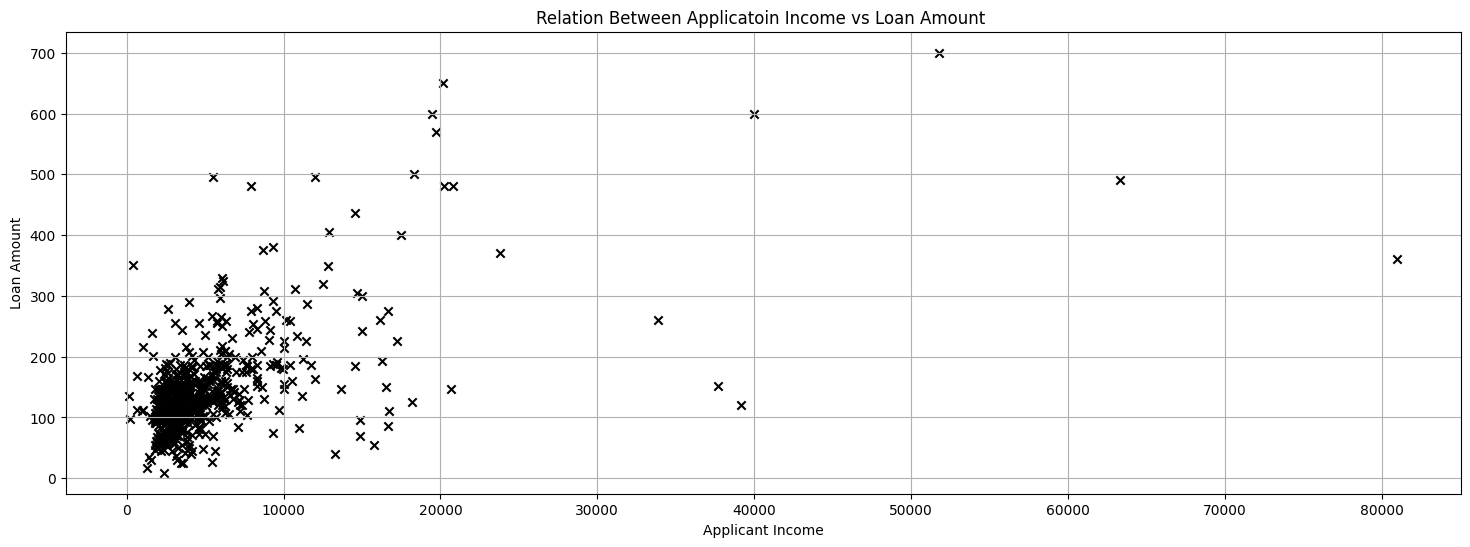

In [19]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [20]:
# Mapping dictionary for Loan_Status
status_map = {'Y': 1, 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(status_map)
df_target = df['Loan_Status']

# One hot encoding on features
df_features = df.drop('Loan_Status', axis = 1)
df_features = pd.get_dummies(df_features)

In [21]:
df_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True


In [22]:
df_target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

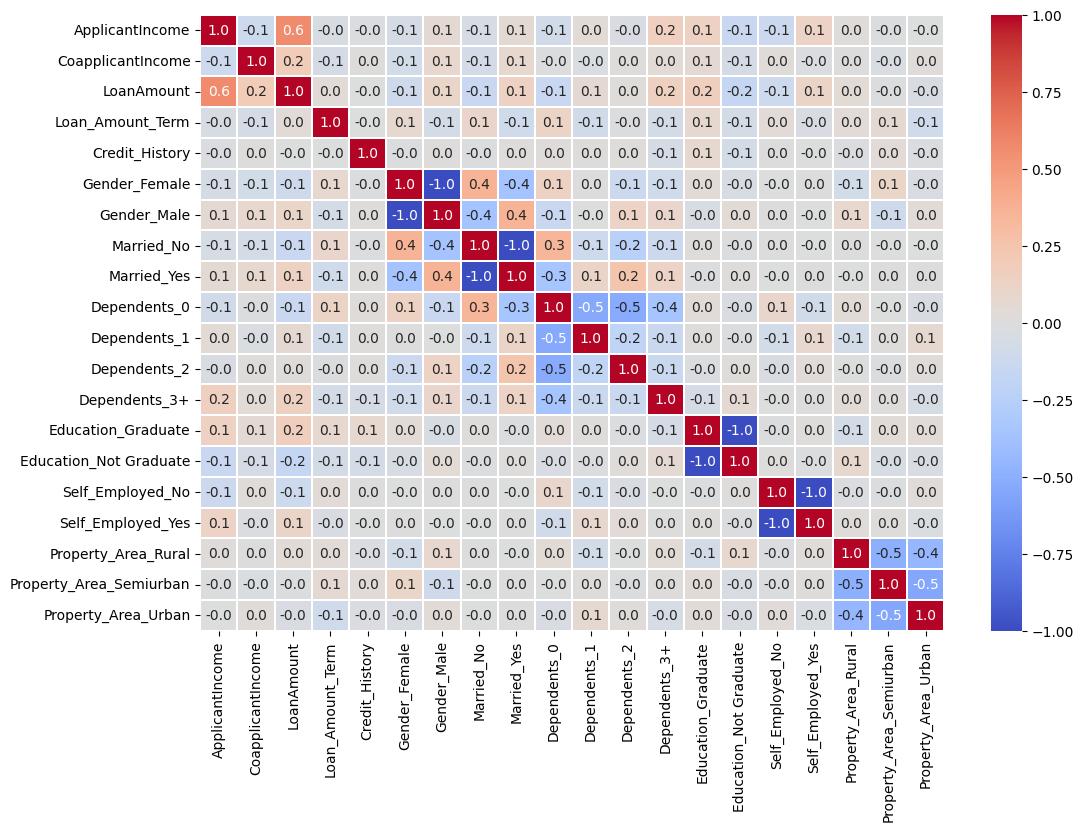

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
y = df_target
X = df_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_predict = model_dt.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

#Confusion matrix
cn = confusion_matrix(y_test, y_predict)
print(f"\n {cn}")

# Extracting TP, TN, FP, FN
tn, fp, fn, tp = cn.ravel()

print(f"\nTrue Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

              precision    recall  f1-score   support

           0       0.52      0.55      0.53        51
           1       0.82      0.81      0.82       134

    accuracy                           0.74       185
   macro avg       0.67      0.68      0.67       185
weighted avg       0.74      0.74      0.74       185

73.51% Accurate

 [[ 28  23]
 [ 26 108]]

True Positives (TP): 108
True Negatives (TN): 28
False Positives (FP): 23
False Negatives (FN): 26


In [29]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_predict = model_rf.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

#Confusion matrix
cn = confusion_matrix(y_test, y_predict)
print(f"\n {cn}")

# Extracting TP, TN, FP, FN
tn, fp, fn, tp = cn.ravel()

print(f"\nTrue Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

              precision    recall  f1-score   support

           0       0.72      0.45      0.55        51
           1       0.82      0.93      0.87       134

    accuracy                           0.80       185
   macro avg       0.77      0.69      0.71       185
weighted avg       0.79      0.80      0.78       185

80.0% Accurate

 [[ 23  28]
 [  9 125]]


In [32]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_predict = model_lr.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

#Confusion matrix
cn = confusion_matrix(y_test, y_predict)
print(f"\n {cn}")

# Extracting TP, TN, FP, FN
tn, fp, fn, tp = cn.ravel()

print(f"\nTrue Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

83.24% Accurate

 [[ 22  29]
 [  2 132]]

True Positives (TP): 132
True Negatives (TN): 22
False Positives (FP): 29
False Negatives (FN): 2
